In [15]:
#Import the necessary modules
import numpy as np
import rasterio as rt
from rasterio.plot import show
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.model_selection import train_test_split

In [16]:
#Open Sentinel2B image
with rt.open('riverImage2.tif') as dataset:
    RGB = dataset.read()

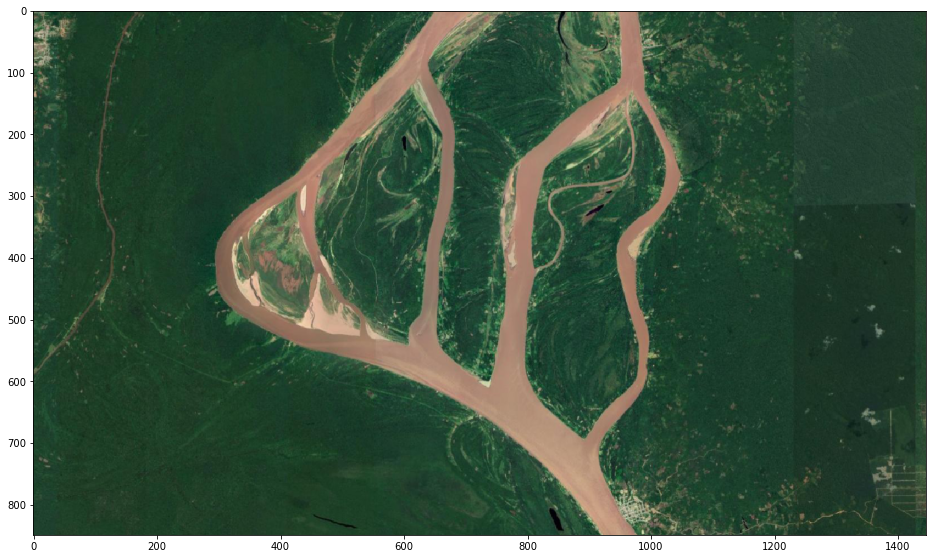

<AxesSubplot:>

In [17]:
plt.figure(figsize= (16,20))
show(RGB)

In [18]:
with rt.open('riverImage2.tif') as dataset:
    blue_band = dataset.read(2)

In [19]:
#Convert the blue band in number of rows, with only one column for the classifier
print('Blue band array shape =', blue_band.shape)
#Reshape the data to fit the classifier
blue = blue_band.reshape((-1,1))
print('After reshaping the blue_band =', blue.shape)

Blue band array shape = (849, 1446)
After reshaping the blue_band = (1227654, 1)


Text(0.5, 1.0, 'Blue Band')

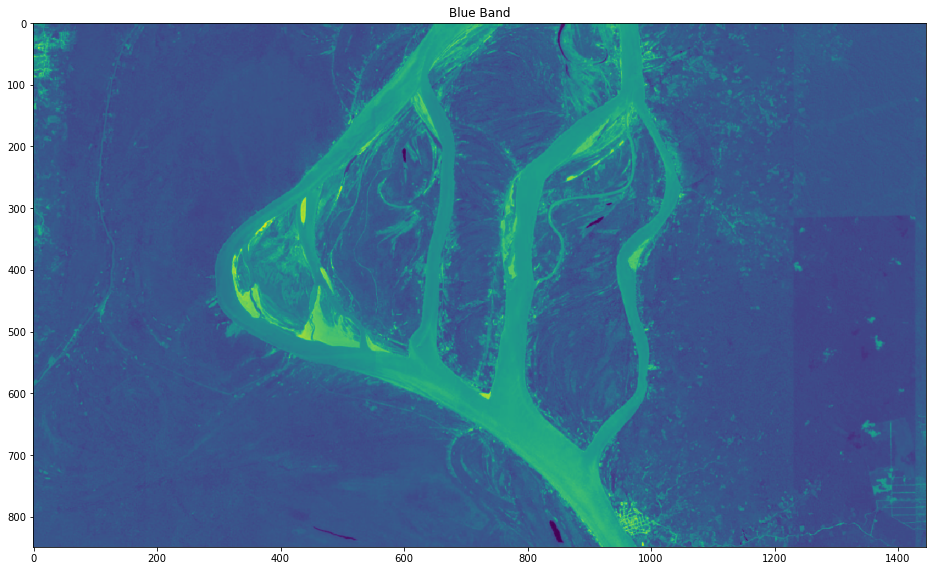

In [20]:
#Plot the blue band
plt.figure(figsize=(16,20))
plt.imshow(blue_band)
plt.title('Blue Band')

In [21]:
#Model fitting with no of clusters (Note: the clusters are selected at random)
cf = cluster.KMeans(n_clusters=3)
cf.fit(blue)

KMeans(n_clusters=3)

In [22]:
# Reshape the labels
X_cluster = cf.labels_
X_cluster = X_cluster.reshape(blue_band.shape)

Text(0.5, 1.0, 'Single Band Clusters')

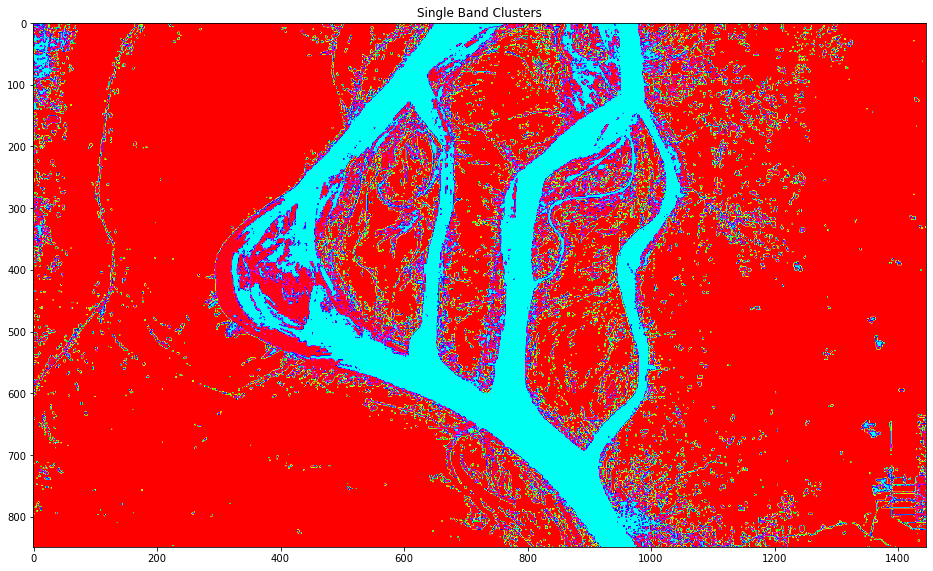

In [23]:
#Plot the classifcation map
plt.figure(figsize = (16, 20))
plt.imshow(X_cluster, cmap ='hsv')
plt.title('Single Band Clusters')

In [24]:
#Apply the Kmean classification on all 4 bands
with rt.open('riverImage2.tif') as dst:
    bands = dst.read()
    print('Number of bands = ', dst.count)
    print('Shape of arrays =', dst.shape)
    print('No of rows =', dst.height)
    print('No of columns =', dst.width)
    print('Data type =', dst.dtypes)

Number of bands =  4
Shape of arrays = (849, 1446)
No of rows = 849
No of columns = 1446
Data type = ('uint8', 'uint8', 'uint8', 'uint8')


In [25]:
#Stack all the bands and reshape them in a 2d array for the model
array = np.stack(bands, axis =2)
array = np.reshape(array, [dst.height*dst.width, dst.count])

In [26]:
#Fit the model to data
k_means = cluster.KMeans(n_clusters = 3)
k_means.fit(array)
X_cluster = k_means.labels_

In [27]:
#Reshape the data again to the original version
X_cluster = X_cluster.reshape((dst.height, dst.width))

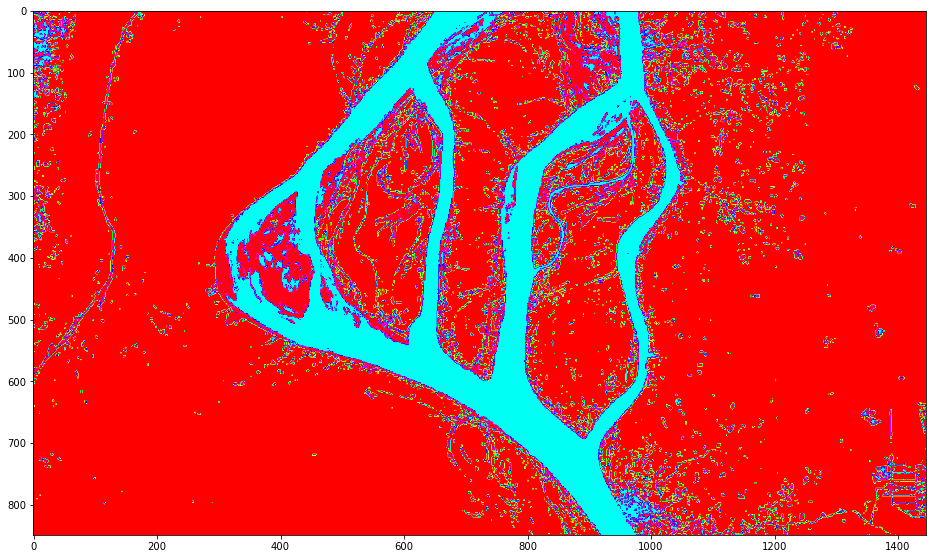

In [28]:
#Plot the classification map
plt.figure(figsize = (16,20))
plt.imshow(X_cluster, cmap = "hsv")